# Objective:
The code demonstrates how to predict stock prices using a Recurrent Neural Network (RNN). RNNs are suitable for time-series data because they can model sequences where past information is crucial for future predictions.

Code Breakdown:
1. Importing Libraries:
NumPy and Pandas are used for numerical operations and data handling, respectively.
Matplotlib is utilized for plotting and visualizing the data.
MinMaxScaler from sklearn.preprocessing scales data to a range between 0 and 1, which helps improve the performance of the neural network.
Keras libraries (Sequential, Dense, SimpleRNN, Dropout) are used to build and train the RNN model.
mean_squared_error from sklearn.metrics evaluates the model’s prediction accuracy by calculating the mean squared error between predicted and actual values.
2. Loading and Preprocessing Data:
The code reads historical stock price data from a CSV file. This data is expected to contain at least two columns: Date and Close.
The Date column is converted to a datetime format to ensure proper sorting and visualization.
The data is sorted by date to maintain the chronological order, which is crucial for time-series analysis.
3. Visualizing the Data:
A plot is generated to visualize the historical stock prices over time. This helps in understanding the trends and fluctuations in the stock prices before applying the model.
4. Scaling the Data:
The MinMaxScaler normalizes the stock prices to a range between 0 and 1. This normalization is important because neural networks work better with data in a consistent range, which helps in faster convergence and better performance.
5. Splitting the Data:
The dataset is divided into training and testing sets. 80% of the data is used for training the model, and 20% is reserved for testing.
This split ensures that the model is trained on the majority of the data while being tested on unseen data to evaluate its generalization ability.
6. Creating Sequences:
To make the data suitable for RNN input, sequences of 60 days of stock prices are created to predict the stock price on the 61st day.
This approach turns the time-series data into a format where the RNN can learn the temporal dependencies.
7. Reshaping Data for RNN:
The data is reshaped to a 3D format where the dimensions represent [samples, time steps, features]. This reshaping is required because RNNs expect data in this format.
8. Building the RNN Model:
A sequential RNN model is constructed with three SimpleRNN layers, each with 50 units. These layers capture the sequential patterns in the data.
Dropout layers with a rate of 20% are added after each RNN layer to prevent overfitting by randomly setting a fraction of the neurons to zero during training.
The final Dense layer with one unit is used to output the predicted stock price.
9. Compiling the Model:
The model is compiled with the adam optimizer, which is effective for most neural network training tasks.
The mean_squared_error loss function is used, suitable for regression problems where the goal is to minimize the error between predicted and actual values.
10. Training the Model:
The model is trained for 20 epochs with a batch size of 32. Training involves adjusting the weights of the model based on the training data, and validation data is used to monitor the model’s performance on unseen data.
11. Making Predictions:
After training, the model predicts stock prices on the test data. The predicted values are then scaled back to the original stock price range using the inverse transformation of the MinMaxScaler.
12. Visualizing the Predictions:
A plot is generated to compare the actual stock prices with the predicted prices. This visualization helps assess the model’s performance and understand how well it has captured the stock price trends.
13. Evaluating the Model:
The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are calculated to quantify the model's prediction accuracy. These metrics provide insights into how well the model is performing and where improvements might be needed.

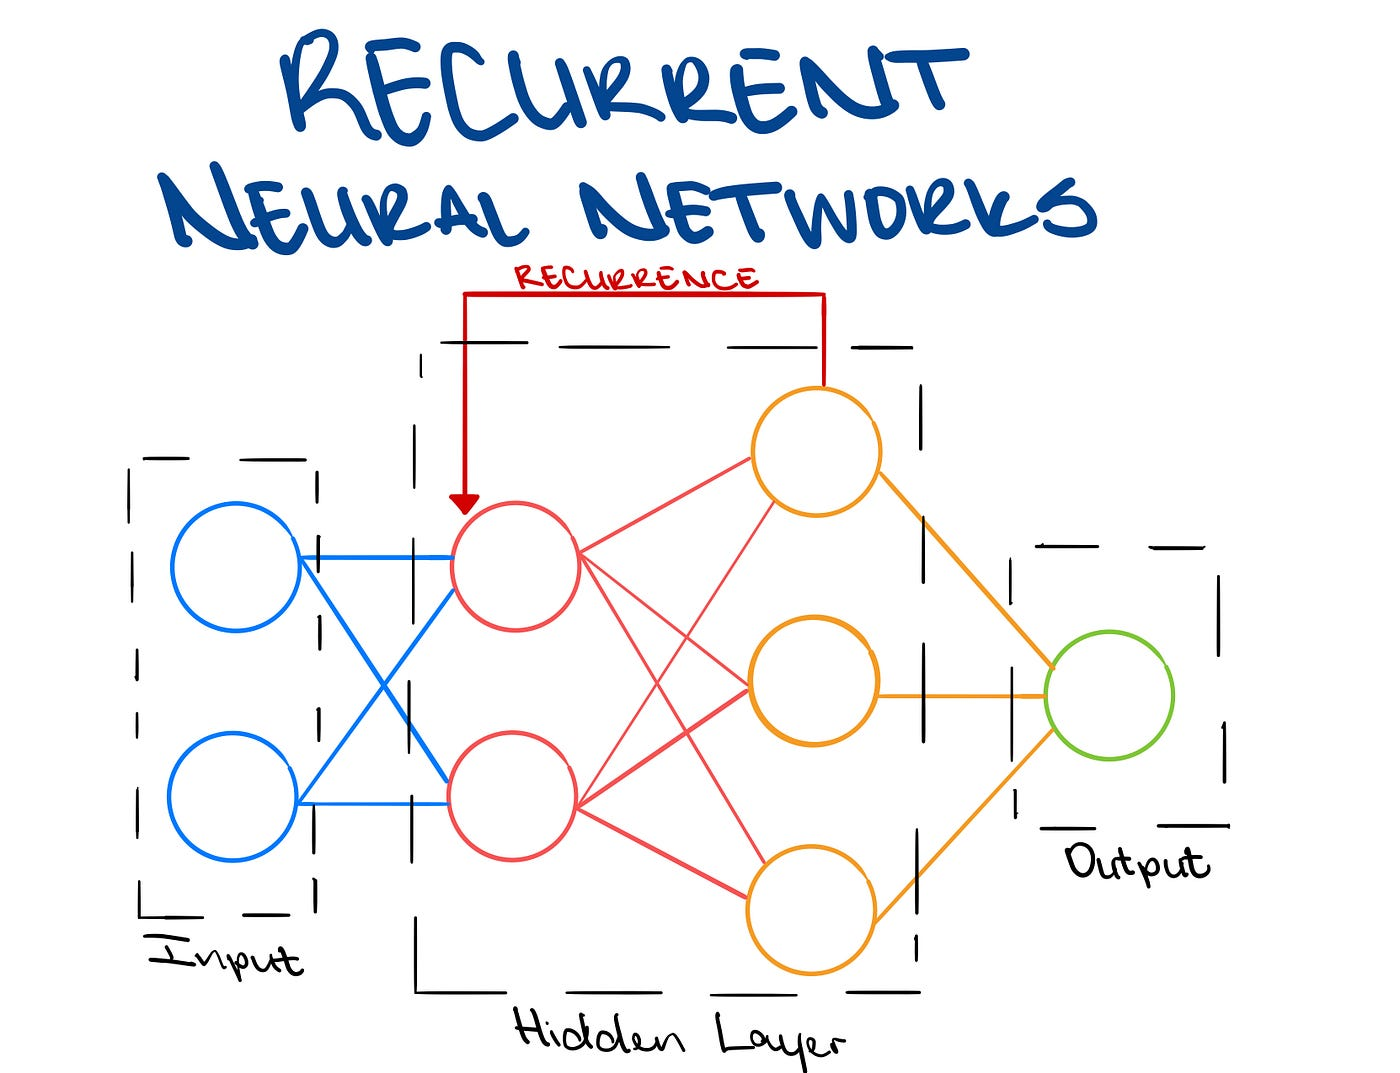

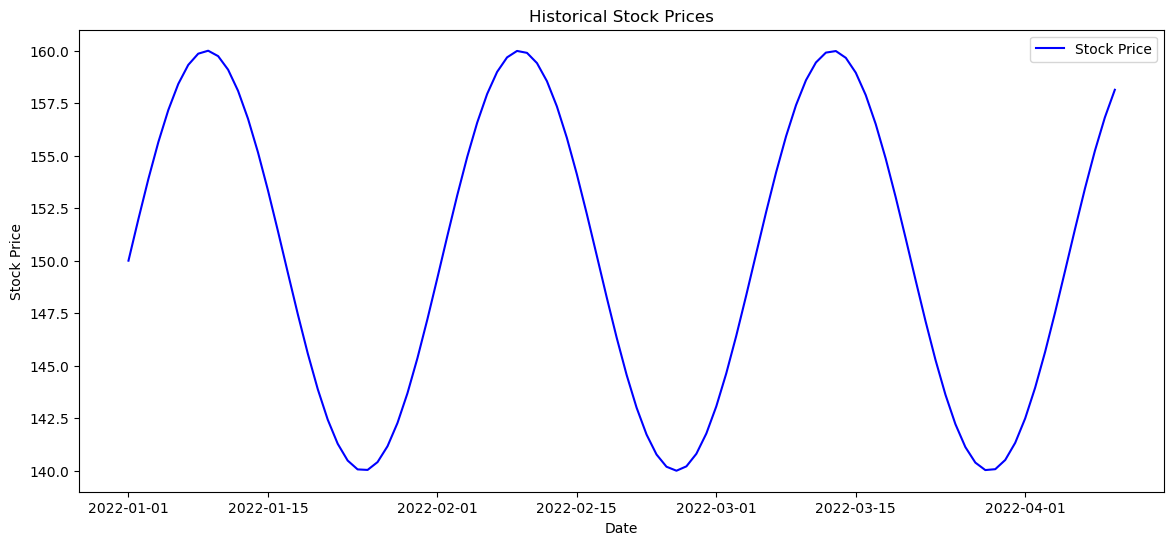

IndexError: tuple index out of range

In [2]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.metrics import mean_squared_error

# Step 1: Data Collection & Preprocessing

# Static data representing stock prices for 100 days
dates = np.arange('2022-01-01', '2022-04-11', dtype='datetime64[D]')
stock_prices = np.array([150 + np.sin(x/5)*10 for x in range(len(dates))])

# Visualize the stock price
plt.figure(figsize=(14, 6))
plt.plot(dates, stock_prices, color='blue', label='Stock Price')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Step 2: Feature Scaling

# Using MinMaxScaler to scale stock prices between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_prices.reshape(-1, 1))

# Step 3: Creating the Training and Test Sets
# Using 80% of the data for training and 20% for testing
training_data_len = int(np.ceil(0.8 * len(scaled_data)))

train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len:]

# Creating sequences for training (each sequence is 60 days of data to predict the 61st day)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])  # Sequence of 60 days
        y.append(data[i, 0])  # 61st day stock price
    return np.array(X), np.array(y)

sequence_length = 60

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape the data to be [samples, time steps, features] for RNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 4: Building the RNN Model using Keras

# Initialize the RNN model
model = Sequential()

# Adding the first RNN layer with 50 units and dropout to avoid overfitting
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second RNN layer with 50 units and dropout
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Adding a third RNN layer with 50 units and dropout
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

# Adding a dense output layer with one neuron for predicting the stock price
model.add(Dense(units=1))

# Step 5: Compile the RNN Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the Model

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Make Predictions on Test Data

# Predicting stock prices using the trained model
predicted_stock_prices = model.predict(X_test)

# Rescaling the predictions back to original scale
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Rescaling the actual stock prices back to original scale for comparison
real_stock_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 8: Visualize the Results

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(14, 6))
plt.plot(real_stock_prices, color='blue', label='Actual Stock Prices')
plt.plot(predicted_stock_prices, color='red', label='Predicted Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Step 9: Model Evaluation

# Calculating the Mean Squared Error (MSE) for the model's performance
mse = mean_squared_error(real_stock_prices, predicted_stock_prices)
print(f'Mean Squared Error: {mse:.4f}')

# Calculating the Root Mean Squared Error (RMSE) to understand prediction accuracy
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.4f}')